In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import sys

raw_ds = pd.read_csv("xgboost_raw_dataset.csv")

raw_ds

,60_min_outf_130,60_min_outf_184,60_min_outf_293,60_min_outf_350,60_min_clstr_outflow,10_min_outf_130,10_min_outf_184,10_min_outf_293,10_min_outf_350,60_min_inf_130,60_min_inf_184,60_min_inf_293,60_min_inf_350,60_min_clstr_inflow,10_min_inf_130,10_min_inf_184,10_min_inf_293,10_min_inf_350
0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
13072,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,2,0,2
13073,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,2,0,0
13074,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0


end_10 13074
2179


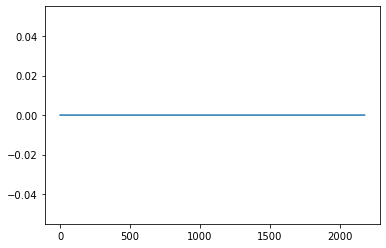

(array([], dtype=int64),)
(array([], dtype=int64),)


In [2]:
"""
TALLY the outflow
"""

# outflow
end_60 = np.where(raw_ds["60_min_clstr_outflow"].isnull() == True)[0][0] ## remove NAN values
end_10 = len(raw_ds) #np.where(raw_ds["10_min_outf_130"].isnull() == True)[0][0]

end = np.minimum(6*end_60,end_10)
end_60 = int(np.floor(end/6))
end_10 = end_60*6
print("end_10",end_10)
end_10_outf = end_10 

chosen_clstr_outf = raw_ds.loc[:end_60-1]["60_min_clstr_outflow"]
chosen_clstr_outf
tot_idx_10_min_outflow = end_10
tot_idx_10_min_outflow

ten_min_stn_outf = raw_ds.loc[:tot_idx_10_min_outflow-1][["10_min_outf_130","10_min_outf_184","10_min_outf_293","10_min_outf_350" ]]
tot_idx_10_min_outflow


ten_min_stn_outf # all staions demand df
agg_stns_outf = [] # aggregated staitons

for i in range(0,tot_idx_10_min_outflow-4,6): # max = 13038
    tot = sum(ten_min_stn_outf.loc[i:i+5].sum())
    agg_stns_outf.append(tot)

min_len = np.minimum(len(agg_stns_outf),len(chosen_clstr_outf))
print(min_len)

agg_stats = np.array(agg_stns_outf[:min_len])
chosen_clstr_outf = np.array(chosen_clstr_outf[:min_len])

plt.plot(agg_stats-chosen_clstr_outf)
plt.show()
print(np.where(agg_stats-chosen_clstr_outf<0))
print(np.where(agg_stats-chosen_clstr_outf>0))

end_10 13074
2179


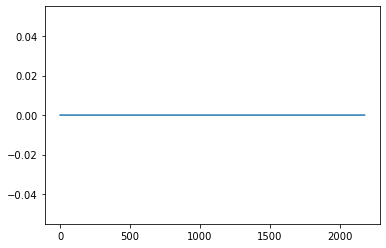

(array([], dtype=int64),)
(array([], dtype=int64),)


In [3]:
"""
TALLY the inflow
"""

# inflow
end_60 = np.where(raw_ds["60_min_clstr_inflow"].isnull() == True)[0][0] ## remove NAN values
end_10 = len(raw_ds) #np.where(raw_ds["10_min_inf_130"].isnull() == True)[0][0] 

end = np.minimum(6*end_60,end_10)
end_60 = int(np.floor(end/6))
end_10 = end_60*6
print("end_10",end_10)
end_10_inf = end_10

chosen_clstr_inf = raw_ds.loc[:end_60-1]["60_min_clstr_inflow"]
chosen_clstr_inf
tot_idx_10_min_inflow = end_10
tot_idx_10_min_inflow

ten_min_stn_inf = raw_ds.loc[:tot_idx_10_min_inflow-1][["10_min_inf_130","10_min_inf_184","10_min_inf_293","10_min_inf_350" ]]
tot_idx_10_min_inflow


ten_min_stn_inf # all staions demand df
agg_stns_inf = [] # aggregated staitons

for i in range(0,tot_idx_10_min_inflow-4,6): # max = 13038
    tot = sum(ten_min_stn_inf.loc[i:i+5].sum())
    agg_stns_inf.append(tot)

min_len = np.minimum(len(agg_stns_inf),len(chosen_clstr_inf))
print(min_len)

agg_stats = np.array(agg_stns_inf[:min_len])
chosen_clstr_inf = np.array(chosen_clstr_inf[:min_len])

plt.plot(agg_stats-chosen_clstr_inf)
plt.show()
print(np.where(agg_stats-chosen_clstr_inf<0))
print(np.where(agg_stats-chosen_clstr_inf>0))

In [4]:
"""""""""
Feature Generation
"""""""""

xgboost_features_df = pd.DataFrame(columns=["dt_ts","stn","sum_blk_outf","net_inflow_stn","en_route_inf","net_inflow_clstr","DeepAR_agg_outflow",
                                                                   "p_1wk_o","p_2wk_o","p_3wk_o", "block_id","ts_of_day", "hr_of_day", "day_of_wk",
                                                                     "day_of_mn", "wk_of_mon"])


"""
Feature description


# dt_ts : date time and time slot. date is y:m:d time is hour. ts is time slot 0-5 for 6 10-min time slots.
# stn : is station number 
# sum_blk_outf : sum of the blocks outflow to one block before present block in the current hour.
# net_inflow_stn : sum of last one days (144 time slots) to current time slot inflow/supply minus the sum of 
#                  last one day to current time slot outflow/demand in current station 
# DeepAR_agg_outflow : Hourly deepar prediction.
# p_1wk_o : previous 1_wk to time slot. seasonal demand 1 week prior to current time slot
# p_2wk_o : previous 2_wk to time slot.
# p_3wk_o : previous 3_wk to time slot.
# block_id : block number, 0 - (num_stations*6 -1). each hour has same block indices/id. combines station and time together as a crossed feature
# en_route_inf : en_route inflow is current supply value at that block
# net_inflow_clstr : how much inflow at cluster level, sum of last one day (24 hours) to current hour inflow/supply minus the sum of 
# last two days to current hour outflow/demand in current cluster
# ts_of_day : time slot of day (0-5) 6*10 mins = 1 hour
# hr_of_day : hour of day
# day_of_wk : day of week
# day_of_mn : day of month
# wk_of_mon : week of month
# p_1ts_o : outflow from previous 1 time slot's 
# p_2ts_o : outflow from previous 2 time slot's
# p_3ts_o : outflow from previous 3 time slot's
"""

# create the dataframe of features for each station first and then concatenate them below each other.
# Finally use pivot table to create 3d table.


"\nFeature description\n\n\n# dt_ts : date time and time slot. date is y:m:d time is hour. ts is time slot 0-5 for 6 10-min time slots.\n# stn : is station number \n# sum_blk_outf : sum of the blocks outflow to one block before present block in the current hour.\n# net_inflow_stn : sum of last one days (144 time slots) to current time slot inflow/supply minus the sum of \n#                  last one day to current time slot outflow/demand in current station \n# DeepAR_agg_outflow : Hourly deepar prediction.\n# p_1wk_o : previous 1_wk to time slot. seasonal demand 1 week prior to current time slot\n# p_2wk_o : previous 2_wk to time slot.\n# p_3wk_o : previous 3_wk to time slot.\n# block_id : block number, 0 - (num_stations*6 -1). each hour has same block indices/id. combines station and time together as a crossed feature\n# en_route_inf : en_route inflow is current supply value at that block\n# net_inflow_clstr : how much inflow at cluster level, sum of last one day (24 hours) to curren

In [5]:
"""
Identify the stations,stn and generate dt_ts
"""

############ Identify stations ############
all_stations = raw_ds.columns
all_stations

ten_min_stns_outf_list = [s for s in all_stations if s[:11] == "10_min_outf"]
ten_min_stns_outf_list

ten_min_stns_inf_list = [s for s in all_stations if s[:10] == "10_min_inf"]
ten_min_stns_inf_list

stn_list = [ s[12:] for s in ten_min_stns_outf_list]
stn_list
############ Identify stations ############



############ generate dt_ts ############
# ensure that both inflow and outflow start and end at the same time
if (end_10_inf == end_10_outf):
    print("10 min inflow and 10 min outflow of same length")
    end_len_10 = end_10_inf # end length
    end_len_60 = int(end_len_10/6)
else:
    print("10 min inflow and 10 min outflow of DIFFERENT length")
    sys.exit()

# specify start date and time:
date = "2021-09-24"
hr = "00" 
min = "00" # 00, 10, 20, 30, 40, 50 represents the timeslots 0,1,2,3,4,5
ts = "0"
string_dt_hr = date + "-" + hr + "-" + min

dt_hr = dt.datetime.strptime(string_dt_hr,"%Y-%m-%d-%H-%M")

dt_dt_ts = []
dt_dt_ts.append(dt_hr)

# create list of datetimes
for _ in range(end_len_10-1):
    dt_hr = dt_hr + dt.timedelta(minutes=10 )
    dt_dt_ts.append(dt_hr)
dt_dt_ts

# convert to string
dt_ts_list = [] 
for i in range(len(dt_dt_ts)):
    dt_ts_list.append( dt.datetime.strftime(dt_dt_ts[i],"%Y/%m/%d %H:%M") )
#dt_ts_list

############ generate dt_ts ############


10 min inflow and 10 min outflow of same length


In [6]:
end_len_10

13074

In [7]:
def create_sum_blk_outf(dt_ts_list,stn_list):
    
    col_list = ["dt_ts"] + [ "sum_blk_outf_"+s for s in stn_list] 
    sum_blk_outf_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        if (dt[-2:] == "00"):
            sum = 0
        for s in stn_list:
            sum_blk_outf_df.loc[i]["sum_blk_outf_"+s] = sum
            sum = sum + raw_ds.loc[i]["10_min_outf_"+s]
            
        
        sum_blk_outf_df.loc[i]["dt_ts"] = dt
        i+=1

    return sum_blk_outf_df

In [8]:
df1 = create_sum_blk_outf(dt_ts_list,stn_list)
df1

,dt_ts,sum_blk_outf_130,sum_blk_outf_184,sum_blk_outf_293,sum_blk_outf_350
0,2021/09/24 00:00,0,0.0,0.0,0.0
1,2021/09/24 00:10,0.0,0.0,0.0,0.0
2,2021/09/24 00:20,0.0,0.0,0.0,0.0
3,2021/09/24 00:30,0.0,0.0,0.0,1.0
4,2021/09/24 00:40,1.0,1.0,1.0,1.0
...,...,...,...,...,...
13069,2021/12/23 18:10,0.0,0.0,0.0,0.0
13070,2021/12/23 18:20,0.0,0.0,0.0,1.0
13071,2021/12/23 18:30,1.0,1.0,1.0,1.0
13072,2021/12/23 18:40,1.0,1.0,1.0,1.0


In [9]:
len(dt_ts_list)

13074

In [10]:
def create_net_inflow_stn(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "net_inflow_stn_"+s for s in stn_list] 
    net_inflow_stn_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    for s in stn_list:
        i=144
        for dt in dt_ts_list[144:]:
            net_inflow_stn_df.loc[i]["net_inflow_stn_"+s] = sum(raw_ds.loc[i-144:i-1]["10_min_inf_"+s]) - sum(raw_ds.loc[i-144:i-1]["10_min_outf_"+s])
            net_inflow_stn_df.loc[i]["dt_ts"] = dt
            i+=1

    return net_inflow_stn_df


In [11]:
df2 = create_net_inflow_stn(dt_ts_list,stn_list)
df2

,dt_ts,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13069,2021/12/23 18:10,0,2,0,-1
13070,2021/12/23 18:20,0,2,1,-1
13071,2021/12/23 18:30,0,2,0,1
13072,2021/12/23 18:40,0,2,0,1


In [12]:
def create_en_route_inf(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "en_route_inf_"+s for s in stn_list] 
    en_route_inf_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            en_route_inf_df.loc[i]["en_route_inf_"+s] = raw_ds.loc[i]["10_min_inf_"+s]
        
        en_route_inf_df.loc[i]["dt_ts"] = dt
        i+=1

    return en_route_inf_df

In [13]:
df3 = create_en_route_inf(dt_ts_list,stn_list)
df3

,dt_ts,en_route_inf_130,en_route_inf_184,en_route_inf_293,en_route_inf_350
0,2021/09/24 00:00,0.0,0.0,0.0,0.0
1,2021/09/24 00:10,0.0,0.0,0.0,0.0
2,2021/09/24 00:20,0.0,0.0,0.0,0.0
3,2021/09/24 00:30,0.0,0.0,0.0,0.0
4,2021/09/24 00:40,0.0,0.0,0.0,0.0
...,...,...,...,...,...
13069,2021/12/23 18:10,0.0,0.0,1.0,0.0
13070,2021/12/23 18:20,0.0,0.0,0.0,1.0
13071,2021/12/23 18:30,0.0,0.0,0.0,0.0
13072,2021/12/23 18:40,0.0,2.0,0.0,2.0


In [14]:
def create_net_inflow_clstr(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "net_inflow_clstr_"+s for s in stn_list] 
    net_inflow_clstr_60 = pd.DataFrame(index= range(end_len_60), columns=col_list)
    col_list = ["dt_ts"] + [ "net_inflow_clstr_10_min_"+s for s in stn_list] 
    net_inflow_clstr_10 = pd.DataFrame(index= range(end_len_10), columns=col_list)


    i=24
    for hr in range(24,end_len_60,1):
        tot_sum = sum(raw_ds.loc[i-24:i-1]["60_min_clstr_inflow"]) - sum(raw_ds.loc[i-24:i-1]["60_min_clstr_outflow"]) 
        for s in stn_list:
            net_inflow_clstr_60.loc[i]["net_inflow_clstr_"+s] = tot_sum
        i+=1

    print(len(net_inflow_clstr_60["net_inflow_clstr_130"].to_numpy()))

    for s in stn_list:
        net_inflow_clstr_10["net_inflow_clstr_10_min_"+s] = np.repeat(  net_inflow_clstr_60["net_inflow_clstr_"+s].to_numpy() ,repeats=6)

    print(len(dt_ts_list))

    net_inflow_clstr_10["dt_ts"] = dt_ts_list

    return net_inflow_clstr_10

In [15]:
df4 = create_net_inflow_clstr(dt_ts_list,stn_list)
df4


2179
13074


,dt_ts,net_inflow_clstr_10_min_130,net_inflow_clstr_10_min_184,net_inflow_clstr_10_min_293,net_inflow_clstr_10_min_350
0,2021/09/24 00:00,NaN,NaN,NaN,NaN
1,2021/09/24 00:10,NaN,NaN,NaN,NaN
2,2021/09/24 00:20,NaN,NaN,NaN,NaN
3,2021/09/24 00:30,NaN,NaN,NaN,NaN
4,2021/09/24 00:40,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13069,2021/12/23 18:10,1.0,1.0,1.0,1.0
13070,2021/12/23 18:20,1.0,1.0,1.0,1.0
13071,2021/12/23 18:30,1.0,1.0,1.0,1.0
13072,2021/12/23 18:40,1.0,1.0,1.0,1.0


In [16]:
def create_DeepAR_agg_outflow(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "DeepAR_agg_outflow_"+s for s in stn_list] 
    DeepAR_agg_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    print(len(raw_ds.loc[:end_len_60-1]["60_min_clstr_outflow"].to_numpy()))

    for s in stn_list:
        DeepAR_agg_outflow_df["DeepAR_agg_outflow_"+s] = np.repeat(  raw_ds.loc[:end_len_60-1]["60_min_clstr_outflow"].to_numpy() ,repeats=6)

    print(len(dt_ts_list))

    DeepAR_agg_outflow_df["dt_ts"] = dt_ts_list


    return DeepAR_agg_outflow_df



In [17]:
df5 = create_DeepAR_agg_outflow(dt_ts_list,stn_list)
df5

2179
13074


,dt_ts,DeepAR_agg_outflow_130,DeepAR_agg_outflow_184,DeepAR_agg_outflow_293,DeepAR_agg_outflow_350
0,2021/09/24 00:00,1.0,1.0,1.0,1.0
1,2021/09/24 00:10,1.0,1.0,1.0,1.0
2,2021/09/24 00:20,1.0,1.0,1.0,1.0
3,2021/09/24 00:30,1.0,1.0,1.0,1.0
4,2021/09/24 00:40,1.0,1.0,1.0,1.0
...,...,...,...,...,...
13069,2021/12/23 18:10,1.0,1.0,1.0,1.0
13070,2021/12/23 18:20,1.0,1.0,1.0,1.0
13071,2021/12/23 18:30,1.0,1.0,1.0,1.0
13072,2021/12/23 18:40,1.0,1.0,1.0,1.0


In [18]:
def create_prev_weeks_outflow(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "p_1wk_o_"+s for s in stn_list] + [ "p_2wk_o_"+s for s in stn_list] + [ "p_3wk_o_"+s for s in stn_list]
    prev_weeks_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=504*6 # 3 weeks back
    for dt in dt_ts_list[504*6:]:
        for s in stn_list:
            prev_weeks_outflow_df.loc[i]["p_1wk_o_"+s] = raw_ds.loc[i-168*6]["10_min_outf_"+s]
            prev_weeks_outflow_df.loc[i]["p_2wk_o_"+s] = raw_ds.loc[i-336*6]["10_min_outf_"+s]
            prev_weeks_outflow_df.loc[i]["p_3wk_o_"+s] = raw_ds.loc[i-504*6]["10_min_outf_"+s]
        
        prev_weeks_outflow_df.loc[i]["dt_ts"] = dt
        i+=1


    return prev_weeks_outflow_df

In [19]:
df6 = create_prev_weeks_outflow(dt_ts_list,stn_list)
df6

,dt_ts,p_1wk_o_130,p_1wk_o_184,p_1wk_o_293,p_1wk_o_350,p_2wk_o_130,p_2wk_o_184,p_2wk_o_293,p_2wk_o_350,p_3wk_o_130,p_3wk_o_184,p_3wk_o_293,p_3wk_o_350
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,2021/12/23 18:10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13070,2021/12/23 18:20,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
13071,2021/12/23 18:30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13072,2021/12/23 18:40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def create_prev_ts_outflow(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "p_1ts_o_"+s for s in stn_list] + [ "p_2ts_o_"+s for s in stn_list] + [ "p_3ts_o_"+s for s in stn_list]
    prev_ts_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=3 # 3 timeslots back
    for dt in dt_ts_list[3:]:
        for s in stn_list:
            prev_ts_outflow_df.loc[i]["p_1ts_o_"+s] = raw_ds.loc[i-1]["10_min_outf_"+s]
            prev_ts_outflow_df.loc[i]["p_2ts_o_"+s] = raw_ds.loc[i-2]["10_min_outf_"+s]
            prev_ts_outflow_df.loc[i]["p_3ts_o_"+s] = raw_ds.loc[i-3]["10_min_outf_"+s]
        
        prev_ts_outflow_df.loc[i]["dt_ts"] = dt
        i+=1

    return prev_ts_outflow_df

In [21]:
df13 = create_prev_ts_outflow(dt_ts_list,stn_list)
df13

,dt_ts,p_1ts_o_130,p_1ts_o_184,p_1ts_o_293,p_1ts_o_350,p_2ts_o_130,p_2ts_o_184,p_2ts_o_293,p_2ts_o_350,p_3ts_o_130,p_3ts_o_184,p_3ts_o_293,p_3ts_o_350
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/09/24 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021/09/24 00:40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,2021/12/23 18:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13070,2021/12/23 18:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13071,2021/12/23 18:30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13072,2021/12/23 18:40,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def create_block_id(dt_ts_list,stn_list):
    
    col_list = ["dt_ts"] + [ "block_id_"+s for s in stn_list] 
    block_id_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        if (dt[-2:] == "00"):
            id = 0
        for s in stn_list:
            block_id_df.loc[i]["block_id_"+s] = id
            id = id + 1
        
        block_id_df.loc[i]["dt_ts"] = dt
        i+=1

    return block_id_df

In [23]:
df7 = create_block_id(dt_ts_list,stn_list)
df7

,dt_ts,block_id_130,block_id_184,block_id_293,block_id_350
0,2021/09/24 00:00,0,1,2,3
1,2021/09/24 00:10,4,5,6,7
2,2021/09/24 00:20,8,9,10,11
3,2021/09/24 00:30,12,13,14,15
4,2021/09/24 00:40,16,17,18,19
...,...,...,...,...,...
13069,2021/12/23 18:10,4,5,6,7
13070,2021/12/23 18:20,8,9,10,11
13071,2021/12/23 18:30,12,13,14,15
13072,2021/12/23 18:40,16,17,18,19


In [24]:
"ts_of_day", "hr_of_day", "day_of_wk","day_of_mn", "ts_of_wk", "wk_of_mn", "mn_of_yr" 

('ts_of_day',
 'hr_of_day',
 'day_of_wk',
 'day_of_mn',
 'ts_of_wk',
 'wk_of_mn',
 'mn_of_yr')

In [25]:
def create_ts_of_day(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "ts_of_day_"+s for s in stn_list] 
    ts_of_day_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            ts_of_day_df.loc[i]["ts_of_day_"+s] = int(int(dt[-2:])/10)

        ts_of_day_df.loc[i]["dt_ts"] = dt
        i+=1

    return ts_of_day_df

In [26]:
df8 = create_ts_of_day(dt_ts_list,stn_list)
df8

,dt_ts,ts_of_day_130,ts_of_day_184,ts_of_day_293,ts_of_day_350
0,2021/09/24 00:00,0,0,0,0
1,2021/09/24 00:10,1,1,1,1
2,2021/09/24 00:20,2,2,2,2
3,2021/09/24 00:30,3,3,3,3
4,2021/09/24 00:40,4,4,4,4
...,...,...,...,...,...
13069,2021/12/23 18:10,1,1,1,1
13070,2021/12/23 18:20,2,2,2,2
13071,2021/12/23 18:30,3,3,3,3
13072,2021/12/23 18:40,4,4,4,4


In [27]:
def create_hr_of_day(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "hr_of_day_"+s for s in stn_list] 
    hr_of_day_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            hr_of_day_df.loc[i]["hr_of_day_"+s] = int(dt[-5:-3])

        hr_of_day_df.loc[i]["dt_ts"] = dt
        i+=1

    return hr_of_day_df

In [28]:
df9 = create_hr_of_day(dt_ts_list,stn_list)
df9

,dt_ts,hr_of_day_130,hr_of_day_184,hr_of_day_293,hr_of_day_350
0,2021/09/24 00:00,0,0,0,0
1,2021/09/24 00:10,0,0,0,0
2,2021/09/24 00:20,0,0,0,0
3,2021/09/24 00:30,0,0,0,0
4,2021/09/24 00:40,0,0,0,0
...,...,...,...,...,...
13069,2021/12/23 18:10,18,18,18,18
13070,2021/12/23 18:20,18,18,18,18
13071,2021/12/23 18:30,18,18,18,18
13072,2021/12/23 18:40,18,18,18,18


In [29]:
def create_day_of_wk(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "day_of_wk_"+s for s in stn_list] 
    day_of_wk_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    fir_year = int(dt_ts_list[0][:4])
    fir_mon = int(dt_ts_list[0][5:7])
    fir_date = int(dt_ts_list[0][8:10])
    fir_hour = int(dt_ts_list[0][11:13])
    fir_hour

    date_time_Stamps = pd.Timestamp(year=fir_year, month=fir_mon, day=fir_date, hour=fir_hour ) + pd.to_timedelta( range(end_len_60), "H")
    date_time_Stamps

    day_of_week = date_time_Stamps.day_of_week
    day_of_week = np.repeat(day_of_week.to_numpy(),repeats=6)
    day_of_week

    for s in stn_list:
        day_of_wk_df["day_of_wk_"+s] = day_of_week
    
    day_of_wk_df["dt_ts"] = dt_ts_list

    return day_of_wk_df

In [30]:
df10 = create_day_of_wk(dt_ts_list,stn_list)
df10

,dt_ts,day_of_wk_130,day_of_wk_184,day_of_wk_293,day_of_wk_350
0,2021/09/24 00:00,4,4,4,4
1,2021/09/24 00:10,4,4,4,4
2,2021/09/24 00:20,4,4,4,4
3,2021/09/24 00:30,4,4,4,4
4,2021/09/24 00:40,4,4,4,4
...,...,...,...,...,...
13069,2021/12/23 18:10,3,3,3,3
13070,2021/12/23 18:20,3,3,3,3
13071,2021/12/23 18:30,3,3,3,3
13072,2021/12/23 18:40,3,3,3,3


In [31]:
def create_day_of_mn(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "day_of_mn_"+s for s in stn_list] 
    day_of_mn_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            day_of_mn_df.loc[i]["day_of_mn_"+s] = int(dt[-8:-6])

        day_of_mn_df.loc[i]["dt_ts"] = dt
        i+=1

    return day_of_mn_df


In [32]:
df11 = create_day_of_mn(dt_ts_list,stn_list)
df11

,dt_ts,day_of_mn_130,day_of_mn_184,day_of_mn_293,day_of_mn_350
0,2021/09/24 00:00,24,24,24,24
1,2021/09/24 00:10,24,24,24,24
2,2021/09/24 00:20,24,24,24,24
3,2021/09/24 00:30,24,24,24,24
4,2021/09/24 00:40,24,24,24,24
...,...,...,...,...,...
13069,2021/12/23 18:10,23,23,23,23
13070,2021/12/23 18:20,23,23,23,23
13071,2021/12/23 18:30,23,23,23,23
13072,2021/12/23 18:40,23,23,23,23


In [33]:
def create_wk_of_mon(dt_ts_list,stn_list):

    col_list = ["dt_ts"] + [ "wk_of_mon_"+s for s in stn_list] 
    wk_of_mon_df = pd.DataFrame(index= range(end_len_10), columns=col_list)
    wk_of_mon_df["dt_ts"] = dt_ts_list

    for s in stn_list:
        wk_of_mon_df["wk_of_mon_"+s] = wk_of_mon_df["dt_ts"].apply(lambda d: (int(d[8:10])-1) // 7 + 1) 

    wk_of_mon_df["dt_ts"] = dt_ts_list

    return wk_of_mon_df




In [34]:
df12 = create_wk_of_mon(dt_ts_list,stn_list)
df12

,dt_ts,wk_of_mon_130,wk_of_mon_184,wk_of_mon_293,wk_of_mon_350
0,2021/09/24 00:00,4,4,4,4
1,2021/09/24 00:10,4,4,4,4
2,2021/09/24 00:20,4,4,4,4
3,2021/09/24 00:30,4,4,4,4
4,2021/09/24 00:40,4,4,4,4
...,...,...,...,...,...
13069,2021/12/23 18:10,4,4,4,4
13070,2021/12/23 18:20,4,4,4,4
13071,2021/12/23 18:30,4,4,4,4
13072,2021/12/23 18:40,4,4,4,4


In [35]:
""""
add Target
"""

df_list = [df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]
df_list1 = []
df_list1.append(df1)

for d in df_list[1:]:
    d = d.drop(columns=["dt_ts"],axis=1)
    df_list1.append(d)

ten_min_stn_outf
target_df = pd.DataFrame()
col_list = ten_min_stn_outf.columns
for s,c in zip(stn_list,col_list):
    target_df["target_"+s] = ten_min_stn_outf[c]

df_list1.append(target_df)

full_ds = pd.concat(df_list1,axis=1)

full_ds # full dataset



,dt_ts,sum_blk_outf_130,sum_blk_outf_184,sum_blk_outf_293,sum_blk_outf_350,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350,en_route_inf_130,...,p_2ts_o_293,p_2ts_o_350,p_3ts_o_130,p_3ts_o_184,p_3ts_o_293,p_3ts_o_350,target_130,target_184,target_293,target_350
0,2021/09/24 00:00,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,2021/09/24 00:10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2021/09/24 00:20,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,2021/09/24 00:30,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,2021/09/24 00:40,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,2021/12/23 18:10,0.0,0.0,0.0,0.0,0,2,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
13070,2021/12/23 18:20,0.0,0.0,0.0,1.0,0,2,1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
13071,2021/12/23 18:30,1.0,1.0,1.0,1.0,0,2,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
13072,2021/12/23 18:40,1.0,1.0,1.0,1.0,0,2,0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [36]:
"""
Remove NaN elements in xgboost_feat_train_ds
"""


col_list = full_ds.columns

idx_arr = np.array([])

for c in col_list:
    i = np.where(full_ds[c].isnull() == True)[0] ## remove NAN values
    if i != []:
        idx_arr = np.append(idx_arr,i) 

largest_nan_idx = int(np.max(idx_arr))
largest_nan_idx


full_ds = full_ds.loc[largest_nan_idx+1:]
full_ds = full_ds.sort_index().reset_index(drop=True)
full_ds.to_csv("xgboost_feat_train_ds_all_stns.csv")
full_ds

C:\Users\josepeeterson.er\AppData\Local\Temp\ipykernel_9028\678654929.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if i != []:
C:\Users\josepeeterson.er\AppData\Local\Temp\ipykernel_9028\678654929.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if i != []:


,dt_ts,sum_blk_outf_130,sum_blk_outf_184,sum_blk_outf_293,sum_blk_outf_350,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350,en_route_inf_130,...,p_2ts_o_293,p_2ts_o_350,p_3ts_o_130,p_3ts_o_184,p_3ts_o_293,p_3ts_o_350,target_130,target_184,target_293,target_350
0,2021/10/15 00:00,0,0.0,0.0,0.0,-1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,2021/10/15 00:10,0.0,0.0,0.0,0.0,-1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,2021/10/15 00:20,1.0,1.0,1.0,1.0,-1,1,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,2021/10/15 00:30,1.0,1.0,1.0,1.0,-1,1,0,-1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
4,2021/10/15 00:40,1.0,1.0,1.0,1.0,-1,1,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,2021/12/23 18:10,0.0,0.0,0.0,0.0,0,2,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
10046,2021/12/23 18:20,0.0,0.0,0.0,1.0,0,2,1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
10047,2021/12/23 18:30,1.0,1.0,1.0,1.0,0,2,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
10048,2021/12/23 18:40,1.0,1.0,1.0,1.0,0,2,0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [37]:

"""
seperate the features dataset into stations and save them as csv.
"""

col_list = full_ds.columns

df_list = [0]*len(stn_list)

i=0
for s in stn_list:
    df_list[i] = pd.DataFrame(index=range(len(full_ds[col_list[0]])))
    df_list[i] = pd.concat([df_list[i], full_ds[col_list[0]]],axis=1)
    #print(df_list[i])
    for c in col_list:
        if c[-3:] == s:
            df_list[i] = pd.concat([df_list[i], full_ds[c]],axis=1)
    i+=1


for d,s in zip(df_list,stn_list):
    #d.insert(1,"hour",d["dt_ts"].apply(lambda x: x[11:13] ))
    #d.insert(2, "min", d["dt_ts"].apply(lambda x: x[-2:] ))
    #d["dt_ts"] = d["dt_ts"].apply(lambda x: x[:10] )
    d.to_csv("xgboost_feat_train_ds_stn_"+s+".csv")



In [38]:
df_list[0]



,dt_ts,sum_blk_outf_130,net_inflow_stn_130,en_route_inf_130,net_inflow_clstr_10_min_130,DeepAR_agg_outflow_130,p_1wk_o_130,p_2wk_o_130,p_3wk_o_130,block_id_130,ts_of_day_130,hr_of_day_130,day_of_wk_130,day_of_mn_130,wk_of_mon_130,p_1ts_o_130,p_2ts_o_130,p_3ts_o_130,target_130
0,2021/10/15 00:00,0,-1,0.0,-1.0,1.0,0.0,0.0,0.0,0,0,0,4,15,3,0.0,0.0,0.0,0
1,2021/10/15 00:10,0.0,-1,0.0,-1.0,1.0,0.0,0.0,0.0,4,1,0,4,15,3,0.0,0.0,0.0,0
2,2021/10/15 00:20,1.0,-1,0.0,-1.0,1.0,0.0,0.0,0.0,8,2,0,4,15,3,0.0,0.0,0.0,0
3,2021/10/15 00:30,1.0,-1,0.0,-1.0,1.0,0.0,0.0,0.0,12,3,0,4,15,3,0.0,0.0,0.0,0
4,2021/10/15 00:40,1.0,-1,0.0,-1.0,1.0,0.0,0.0,0.0,16,4,0,4,15,3,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,2021/12/23 18:10,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,18,3,23,4,0.0,0.0,0.0,0
10046,2021/12/23 18:20,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0,8,2,18,3,23,4,0.0,0.0,0.0,0
10047,2021/12/23 18:30,1.0,0,0.0,1.0,1.0,0.0,0.0,0.0,12,3,18,3,23,4,0.0,0.0,0.0,0
10048,2021/12/23 18:40,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,16,4,18,3,23,4,0.0,0.0,0.0,0
